In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
read_file = pd.read_csv ("/content/Suicides in India 2001-2012.csv")

In [32]:
read_file.shape

(237519, 7)

In [33]:
# Size of the dataframe
print("Size of the dataframe:", read_file.size)

# Datatypes of each column
print("\nDatatypes of each column:\n", read_file.dtypes)

# First 5 rows of the dataframe
print("\nFirst 5 rows of the dataframe:\n", read_file.head())

# Last 5 rows of the dataframe
print("\nLast 5 rows of the dataframe:\n", read_file.tail())

Size of the dataframe: 1662633

Datatypes of each column:
 State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

First 5 rows of the dataframe:
            State  Year Type_code                                     Type  \
0  A & N Islands  2001    Causes                       Illness (Aids/STD)   
1  A & N Islands  2001    Causes  Bankruptcy or Sudden change in Economic   
2  A & N Islands  2001    Causes  Cancellation/Non-Settlement of Marriage   
3  A & N Islands  2001    Causes        Physical Abuse (Rape/Incest Etc.)   
4  A & N Islands  2001    Causes                            Dowry Dispute   

   Gender Age_group  Total  
0  Female      0-14      0  
1  Female      0-14      0  
2  Female      0-14      0  
3  Female      0-14      0  
4  Female      0-14      0  

Last 5 rows of the dataframe:
               State  Year      Type_code             Type Gender Age_group  \
237514 

In [34]:
unique_states = read_file['State'].unique()
print(unique_states)

['A & N Islands' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chandigarh' 'Chhattisgarh' 'D & N Haveli' 'Daman & Diu' 'Delhi (Ut)'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir'
 'Jharkhand' 'Karnataka' 'Kerala' 'Lakshadweep' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Puducherry' 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu'
 'Total (All India)' 'Total (States)' 'Total (Uts)' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal']


In [35]:
unique_years = read_file['Year'].unique()
print(unique_years)

[2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012]


In [36]:
unique_type_codes = read_file['Type_code'].unique()
print(unique_type_codes)

['Causes' 'Education_Status' 'Means_adopted' 'Professional_Profile'
 'Social_Status']


In [37]:
unique_types = read_file['Type'].unique()
print(unique_types)

['Illness (Aids/STD)' 'Bankruptcy or Sudden change in Economic'
 'Cancellation/Non-Settlement of Marriage'
 'Physical Abuse (Rape/Incest Etc.)' 'Dowry Dispute' 'Family Problems'
 'Ideological Causes/Hero Worshipping' 'Other Prolonged Illness'
 'Property Dispute' 'Fall in Social Reputation' 'Illegitimate Pregnancy'
 'Failure in Examination' 'Insanity/Mental Illness' 'Love Affairs'
 'Professional/Career Problem' 'Divorce' 'Drug Abuse/Addiction'
 'Not having Children(Barrenness/Impotency' 'Causes Not known'
 'Unemployment' 'Other Causes (Please Specity)' 'Poverty'
 'Death of Dear Person' 'Cancer' 'Suspected/Illicit Relation' 'Paralysis'
 'Diploma' 'No Education' 'Post Graduate and Above' 'Middle' 'Graduate'
 'Hr. Secondary/Intermediate/Pre-Universit' 'Primary'
 'Matriculate/Secondary' 'By Consuming Insecticides' 'By Hanging'
 'By Jumping from (Other sites)' 'By touching electric wires' 'By Machine'
 'By Fire/Self Immolation' 'By Jumping off Moving Vehicles/Trains'
 'By Other means (please

In [38]:
# Unique values in 'Gender' column
unique_genders = read_file['Gender'].unique()
print("Unique Genders:", unique_genders)

# Unique values in 'Age_group' column
unique_age_groups = read_file['Age_group'].unique()
print("Unique Age Groups:", unique_age_groups)

# Statistics for 'Total' column
total_stats = read_file['Total'].describe()
print("\nStatistics for 'Total' column:\n", total_stats)

Unique Genders: ['Female' 'Male']
Unique Age Groups: ['0-14' '15-29' '30-44' '45-59' '60+' '0-100+']

Statistics for 'Total' column:
 count    237519.000000
mean         55.034477
std         792.749038
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max       63343.000000
Name: Total, dtype: float64


In [39]:
# Filter the dataframe to keep only rows where 'State' is in unique_states
filtered_df = read_file[read_file['State'].isin(unique_states)]
print(filtered_df)

                State  Year      Type_code  \
0       A & N Islands  2001         Causes   
1       A & N Islands  2001         Causes   
2       A & N Islands  2001         Causes   
3       A & N Islands  2001         Causes   
4       A & N Islands  2001         Causes   
...               ...   ...            ...   
237514    West Bengal  2012  Social_Status   
237515    West Bengal  2012  Social_Status   
237516    West Bengal  2012  Social_Status   
237517    West Bengal  2012  Social_Status   
237518    West Bengal  2012  Social_Status   

                                           Type  Gender Age_group  Total  
0                            Illness (Aids/STD)  Female      0-14      0  
1       Bankruptcy or Sudden change in Economic  Female      0-14      0  
2       Cancellation/Non-Settlement of Marriage  Female      0-14      0  
3             Physical Abuse (Rape/Incest Etc.)  Female      0-14      0  
4                                 Dowry Dispute  Female      0-14      0

In [40]:
#Removing the values from the column 'State' and making new dataframe, 'statewise_df'

statewise_df = filtered_df.drop(filtered_df[(filtered_df.State == 'Total (Uts)') | (filtered_df.State == 'Total (All India)') |
               (filtered_df.State == 'Total (States)')].index)

In [41]:
statewise_df = statewise_df.drop(statewise_df[statewise_df['Total'] == 0].index)

# Renaming the 'Type' which has almost the same meaning
statewise_df.replace('Bankruptcy or Sudden change in Economic',
           'Bankruptcy or Sudden change in Economic Status', inplace=True)
statewise_df.replace('By Other means (please specify)', 'By Other means', inplace=True)
statewise_df.replace('Not having Children(Barrenness/Impotency)',
           'Not having Children (Barrenness/Impotency)', inplace=True)

# Use the length of the DataFrame to create the new index
statewise_df = statewise_df.set_index(pd.Index(range(len(statewise_df))))

# Display the first few rows of the cleaned dataframe
statewise_df.head()

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Love Affairs,Female,0-14,1
1,A & N Islands,2001,Causes,Other Causes (Please Specity),Female,0-14,1
2,A & N Islands,2001,Causes,Other Prolonged Illness,Male,0-14,1
3,A & N Islands,2001,Causes,Failure in Examination,Male,0-14,1
4,A & N Islands,2001,Causes,Other Prolonged Illness,Female,15-29,8


In [42]:
import seaborn as sns  #https://seaborn.pydata.org/generated/seaborn.set_style.html
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
#We use rc i.e a runtime configuration (rc) containing the default styles for every plot element you create
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor']='#00000000'

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


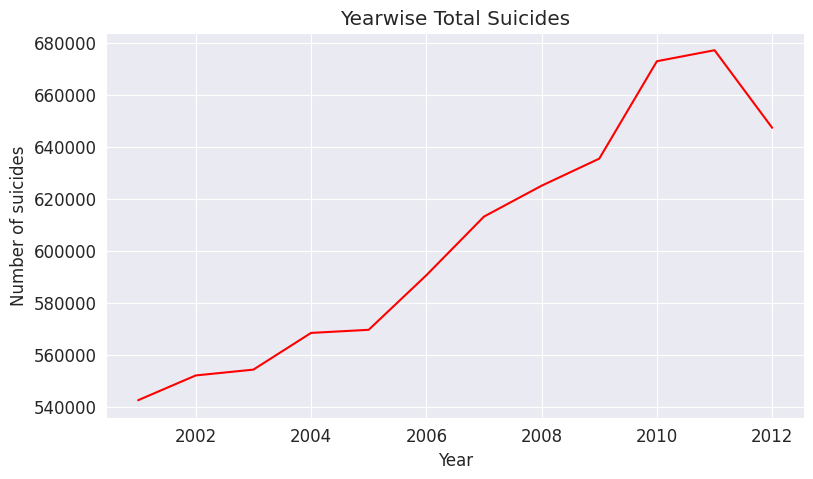

In [43]:

yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()
print('Total number of suicides in each year: ', yearwise_total_suicide)

#plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize = (9,5), color = 'r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides');

Total number of suicides in each year:  Year
2001    542440
2002    551980
2003    554218
2004    568349
2005    569545
2006    590543
2007    613119
2008    625014
2009    635429
2010    672926
2011    677159
2012    647288
Name: Total, dtype: int64


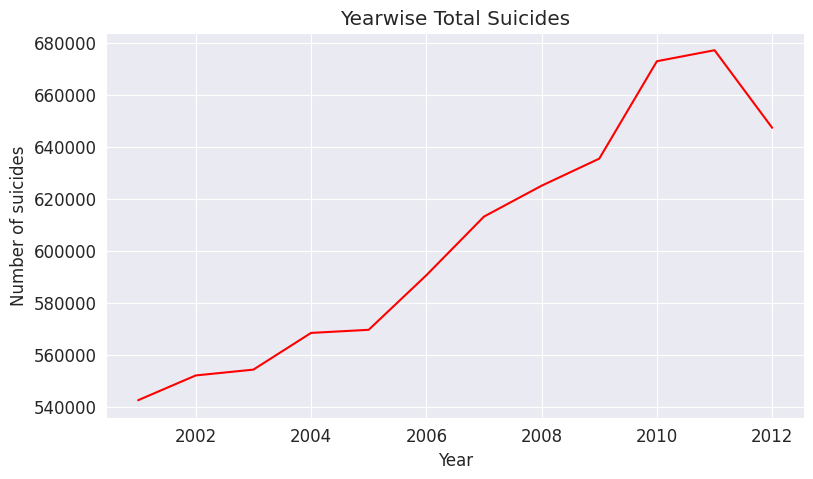

In [44]:
# Group by 'Year' and sum the 'Total' column for each year
yearwise_total_suicide = statewise_df.groupby("Year")["Total"].sum()

# Print the total suicides for each year
print('Total number of suicides in each year: ', yearwise_total_suicide)

# Plotting this in a line graph
yearwise_total_suicide.plot(kind="line", figsize=(9, 5), color='r')
plt.title('Yearwise Total Suicides')
plt.xlabel('Year')
plt.ylabel('Number of suicides')
plt.show()  # Add plt.show() to display the plot

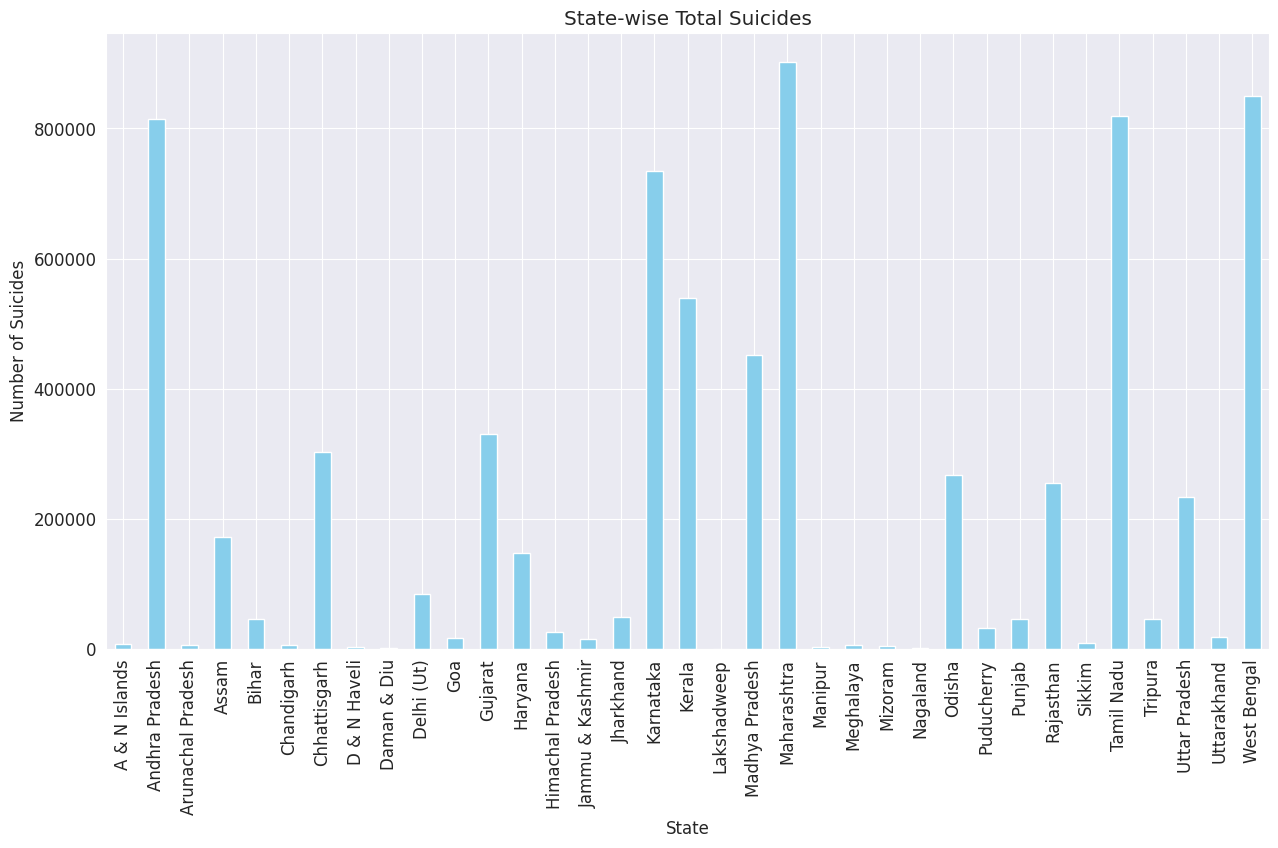

In [45]:
# Grouping the data by 'State' and summing the 'Total' column to get the total number of suicides for each state
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()

# Plotting the state-wise total suicides in a bar graph
plt.figure(figsize=(15, 8))
statewise_total_suicide.plot(kind="bar", color='skyblue')
plt.title('State-wise Total Suicides')
plt.xlabel('State')
plt.ylabel('Number of Suicides')
plt.xticks(rotation=90)
plt.show()

Total number of suicides in each State :  State
A & N Islands          8109
Andhra Pradesh       814059
Arunachal Pradesh      6633
Assam                172276
Bihar                 46214
Chandigarh             5164
Chhattisgarh         302354
D & N Haveli           3430
Daman & Diu            1391
Delhi (Ut)            84272
Goa                   17363
Gujarat              330858
Haryana              147176
Himachal Pradesh      26562
Jammu & Kashmir       14821
Jharkhand             49720
Karnataka            734825
Kerala               538946
Lakshadweep              50
Madhya Pradesh       451535
Maharashtra          901945
Manipur                2102
Meghalaya              5415
Mizoram                4154
Nagaland               1728
Odisha               267234
Puducherry            32144
Punjab                46350
Rajasthan            255134
Sikkim                 9606
Tamil Nadu           818691
Tripura               45965
Uttar Pradesh        233352
Uttarakhand           18496


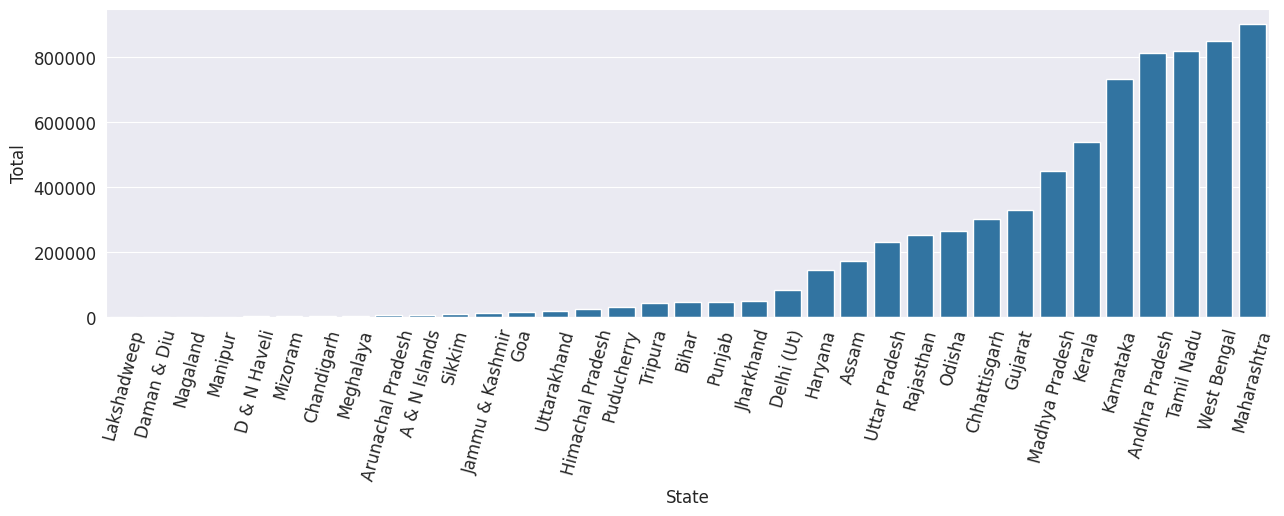

In [46]:
#Creating a series of total suicides on the basis of states
statewise_total_suicide = statewise_df.groupby("State")["Total"].sum()
print('Total number of suicides in each State : ', statewise_total_suicide)

#plotting the above data
filter_state = pd.DataFrame(statewise_total_suicide.reset_index())
sort_state = filter_state.sort_values('Total',ascending = True)
f, ax = plt.subplots(figsize=(15, 4))
#sns.barplot(y = 'Total', x = 'State',data = sort_state,edgecolor = '0.5')
sns.barplot(y = 'Total', x = 'State',data = sort_state)
plt.xticks(rotation=75);
plt.show()

<Figure size 1500x800 with 0 Axes>

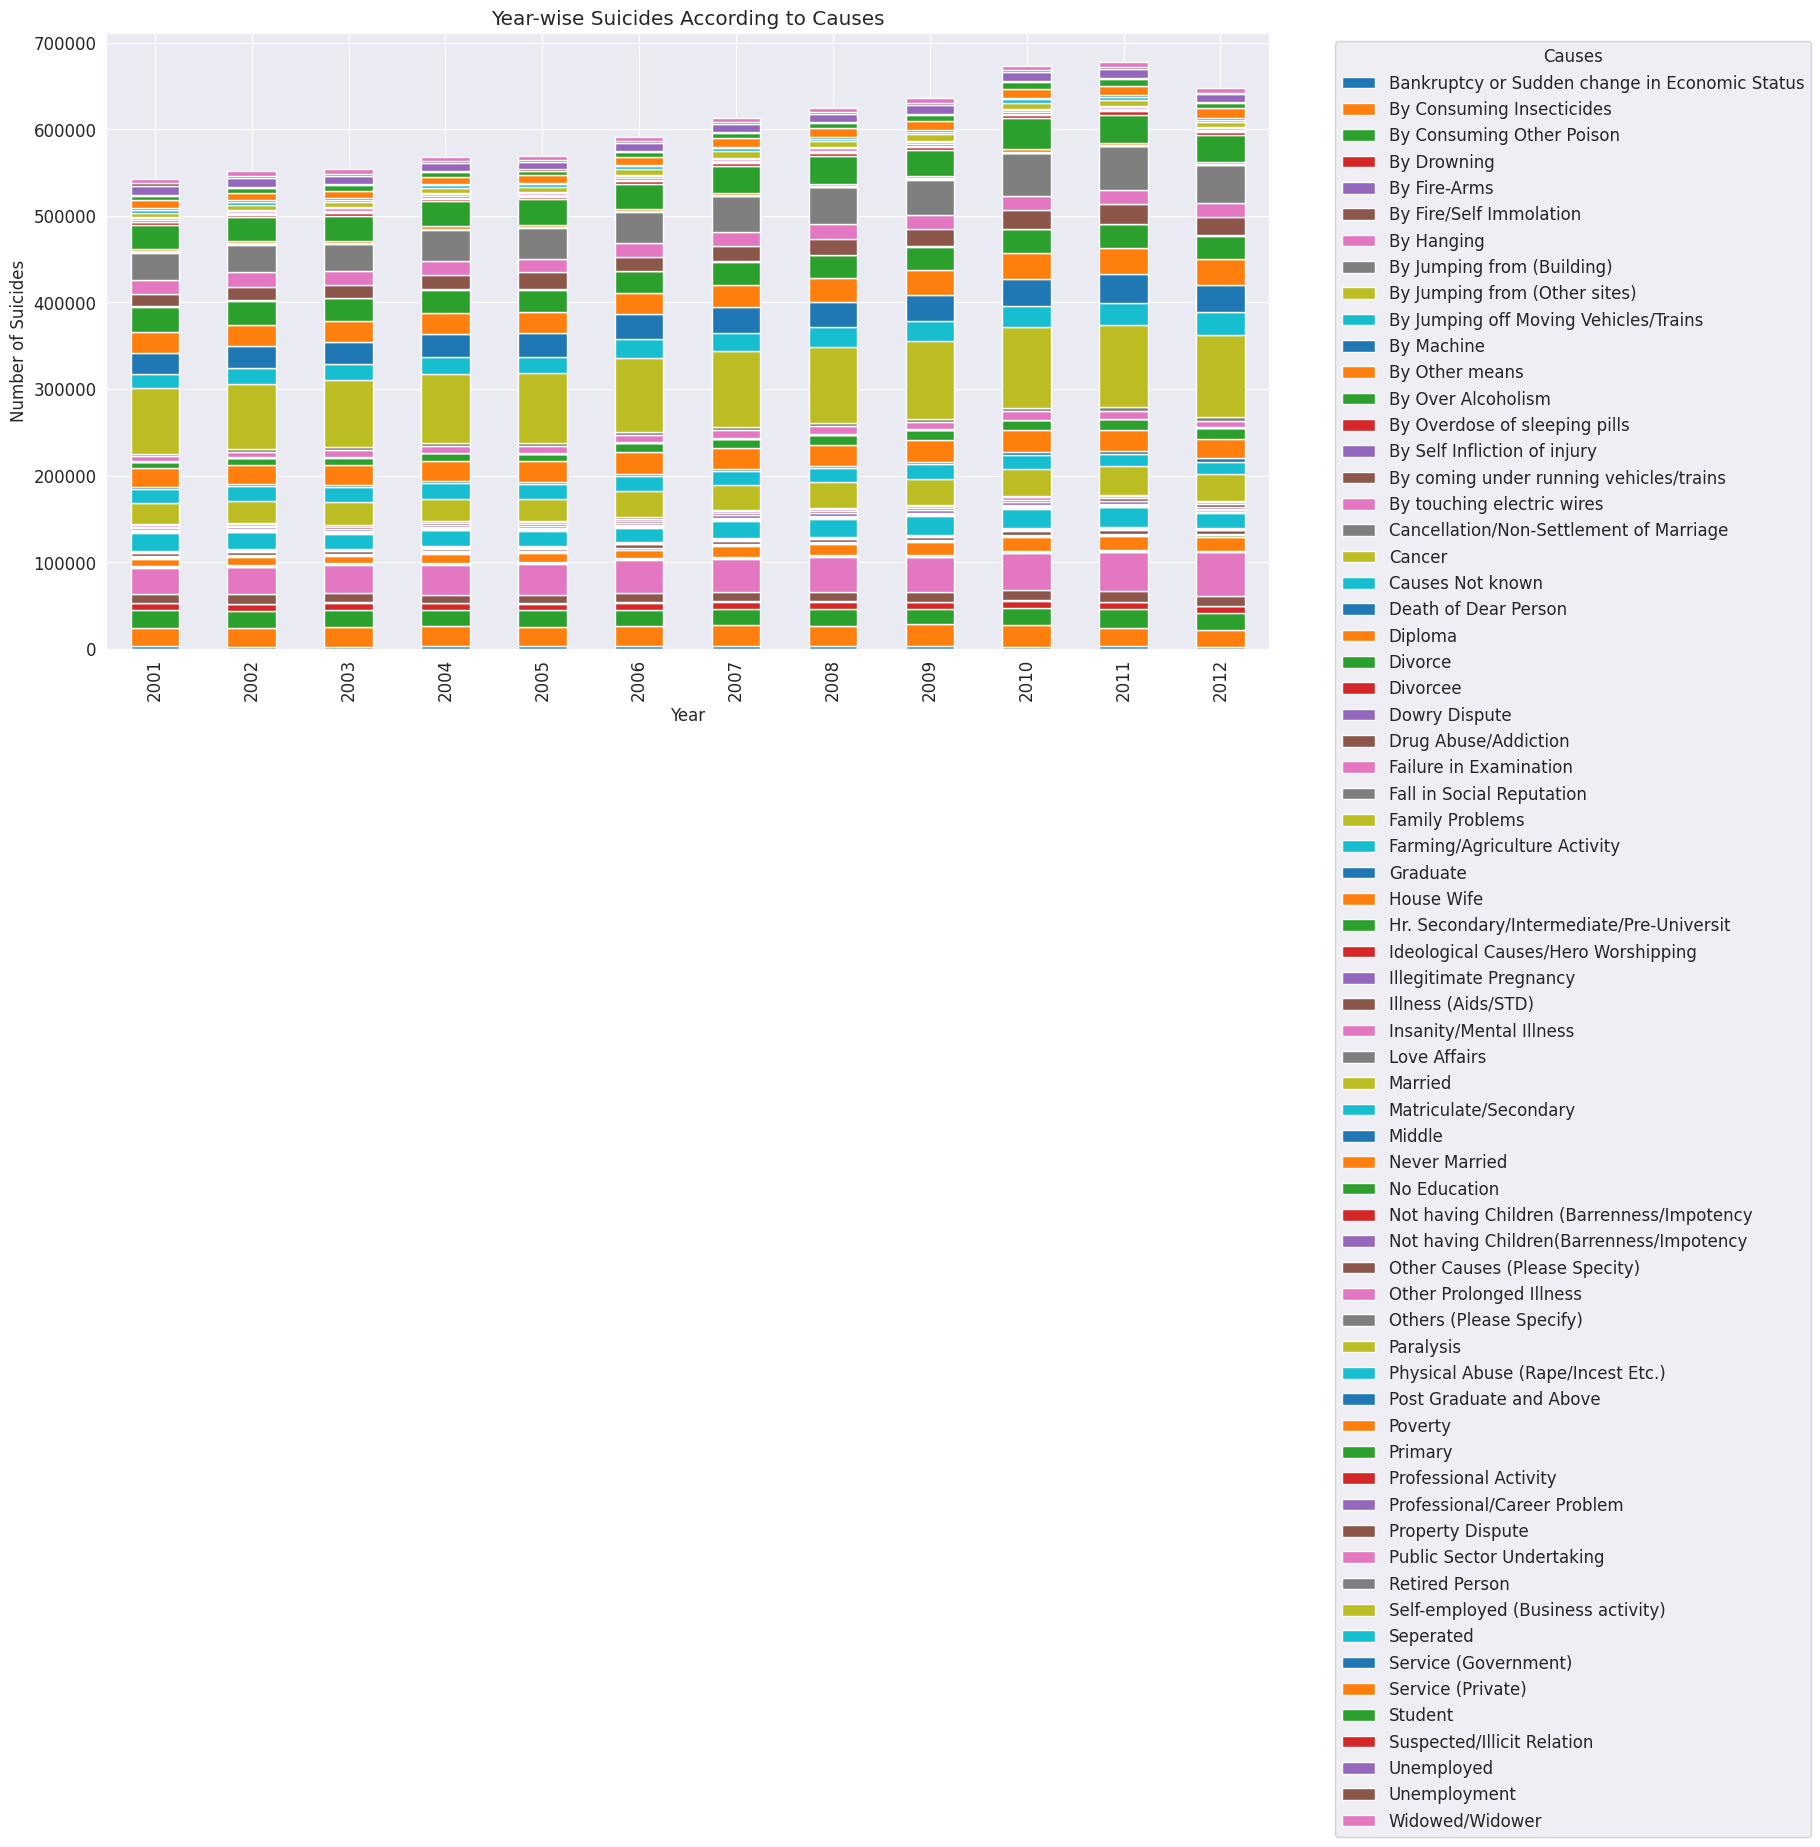

In [47]:
# Grouping the data by 'Year' and 'Type' and summing the 'Total' column
causes_yearwise_suicide = statewise_df.groupby(['Year', 'Type'])['Total'].sum().unstack()

# Plotting the data
plt.figure(figsize=(15, 8))
causes_yearwise_suicide.plot(kind='bar', stacked=True, figsize=(15, 8))
plt.title('Year-wise Suicides According to Causes')
plt.xlabel('Year')
plt.ylabel('Number of Suicides')
plt.legend(title='Causes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Total number of suicides according to gender:  Gender
Female    2606922
Male      4641088
Name: Total, dtype: int64


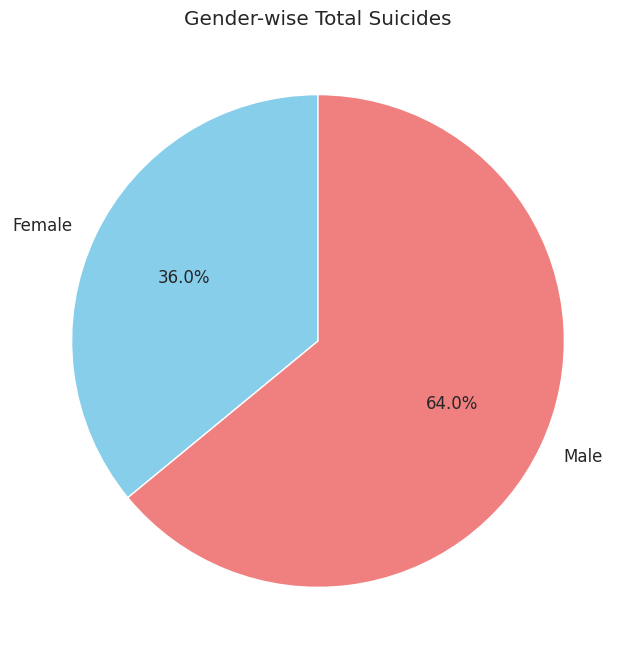

In [48]:
# Grouping the data by 'Gender' and summing the 'Total' column
genderwise_suicide = statewise_df.groupby("Gender")["Total"].sum()
print('Total number of suicides according to gender: ', genderwise_suicide)

# Plotting the gender-wise total suicides in a pie chart
plt.figure(figsize=(8, 8))
genderwise_suicide.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender-wise Total Suicides')
plt.ylabel('')  # Hide the y-label
plt.show()

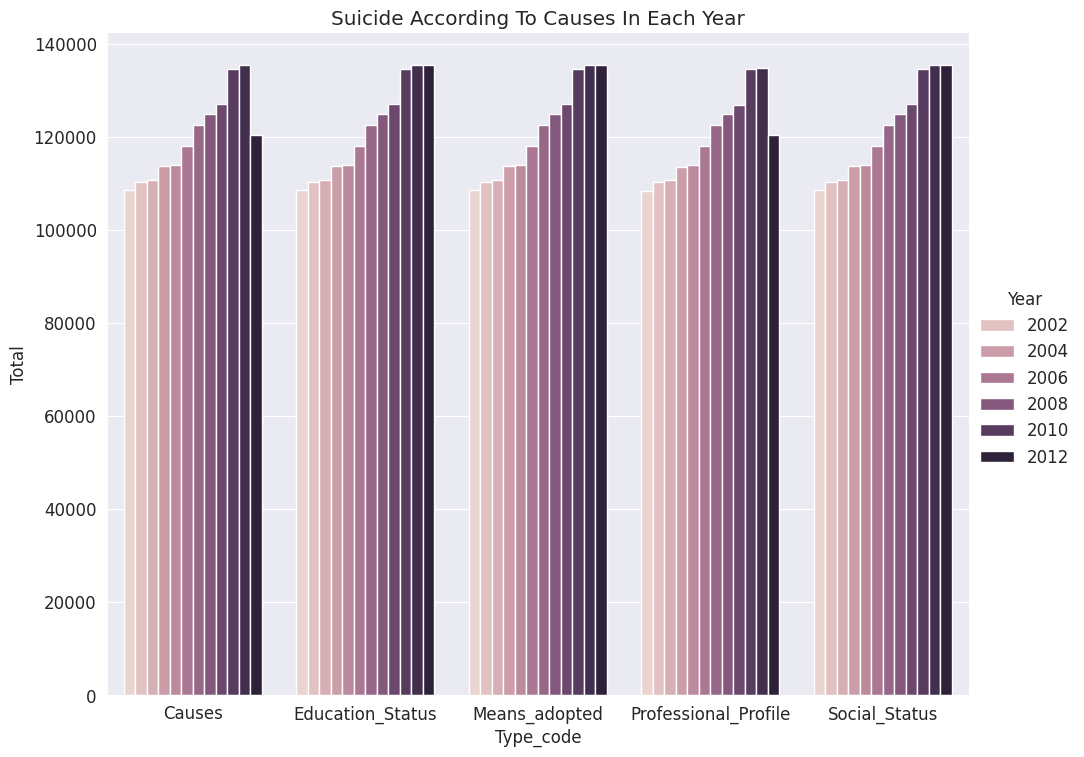

In [49]:
#Filtering the data according to 'type_code','Total' and 'Year'
filter_type_code = pd.DataFrame(statewise_df.groupby(["Type_code","Year"])["Total"].sum()).reset_index()

#Plotting the above data
sns.catplot(x="Type_code", y="Total",hue="Year", kind="bar", data=filter_type_code,height=7.5, aspect=10/7.5);
plt.title('Suicide According To Causes In Each Year');

Gender
Male      54841
Female    46269
Name: count, dtype: int64


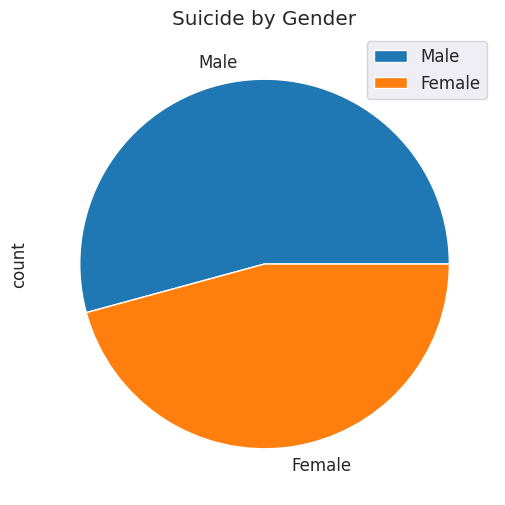

In [50]:
#Gender Suicide Frequency
#counts = statewise_df['Gender'].value_counts().sort_index()
counts = statewise_df['Gender'].value_counts()
print(counts)

# Plot a pie chart
counts.plot(kind='pie', title='Suicide by Gender',figsize=(6,6))
plt.legend()
plt.show()

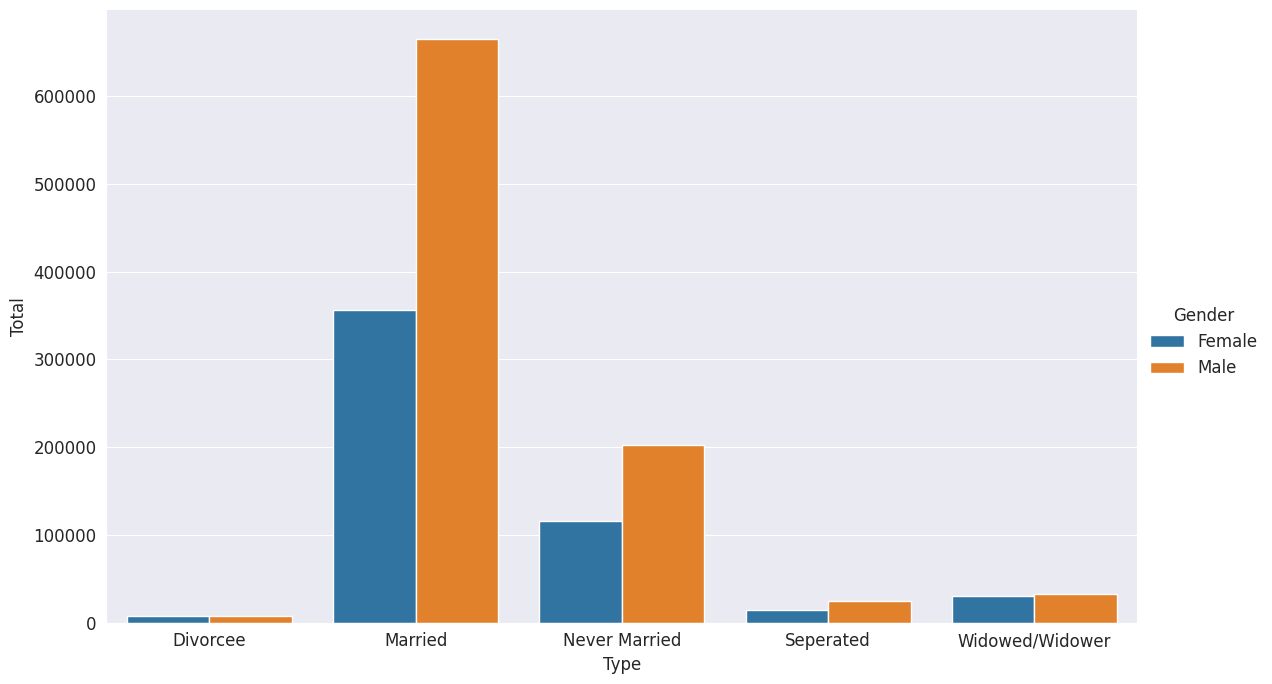

In [51]:
#filtering data according to the social status
filter_social_status = pd.DataFrame(statewise_df[statewise_df["Type_code"]=="Social_Status"].groupby(["Type","Gender"])["Total"].sum()).reset_index()

#plotting the above data
sns.catplot(x="Type", y="Total",hue="Gender", kind="bar", data=filter_social_status,height=7,aspect=11.7/7);

Age_group
0-14      9639
15-29    24960
30-44    24064
45-59    19730
60+      13766
Name: count, dtype: int64


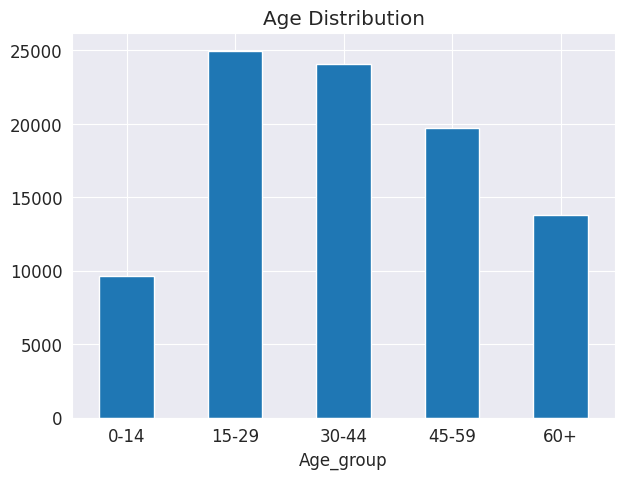

In [52]:
#Age Distributiion
statewise_Age_df = statewise_df.drop(statewise_df[statewise_df.Age_group == '0-100+'].index)

counts = statewise_Age_df['Age_group'].value_counts().sort_index()
print(counts)

counts.plot(kind='bar', title='Age Distribution',figsize=(7,5))
plt.xticks(rotation=0)
plt.show()


In [53]:
#Most of death are from age group 15 to 29.
#Least deaths are from age group 0-14.as_integer_ratio
